# Evaluating Algorithms for Imbalanced Data
## 1 Introduction
Imbalanced data is a common challenge in machine learning, where the number of instances in one class significantly outweighs those in other classes [1]. This imbalance often leads to biased models that perform well on the majority class but poorly on minority classes, which are frequently of greater importance in real-world applications.

This article explores the concept of imbalanced data and reviews several widely used techniques for addressing this issue, including the Synthetic Minority Over-sampling Technique (SMOTE) [6], Balanced Random Forest (BRF), and cost-sensitive learning[5]. In addition, evaluation metrics specifically designed for imbalanced classification problems—such as Cohen’s Kappa [3], G-mean [4], and the Area Under the Receiver Operating Characteristic Curve (AUC)[7]—are introduced and discussed.

By comparing model performance using these metrics, this study aims to identify the strengths and limitations of different algorithms in handling imbalanced datasets.

## 2 Conception
Before conducting the experiments, it is necessary to understand the key concepts related to imbalanced data, the algorithms used to address it, and the evaluation metrics applied. This section provides the theoretical foundation for the experimental analysis.

### 2.1 Imbalanced Data
Imbalanced data refers to a classification problem in which the distribution of classes is highly uneven, meaning that one class (the majority class) contains significantly more instances than the other class or classes (the minority class)[1]. This situation is common in many real-world applications, such as fraud detection, medical diagnosis, and network intrusion detection, where the events of interest occur rarely.

In imbalanced datasets, traditional machine learning algorithms tend to be biased toward the majority class, as minimizing overall error often leads to ignoring minority class instances. As a result, models trained on imbalanced data may achieve high accuracy while performing poorly on the minority class, which is often the most important class in practice.

### 2.2 Algorithms for Handling Imbalanced Data
Several approaches have been proposed to address the challenges posed by imbalanced data. These methods can generally be divided into data-level and algorithm-level techniques.

Data-level methods aim to rebalance the class distribution by modifying the training data. One widely used technique is the Synthetic Minority Over-sampling Technique (SMOTE) [6], which generates new synthetic samples for the minority class by interpolating between existing minority instances. This approach helps reduce bias toward the majority class without simply duplicating existing samples, but it may introduce noise or increase the risk of overfitting.

Algorithm-level methods modify the learning process itself to account for class imbalance. Balanced Random Forest (BRF) is an extension of the standard Random Forest algorithm, where each decision tree is trained on a balanced bootstrap sample obtained by under-sampling the majority class. This encourages each tree to give equal importance to both classes, improving minority class prediction performance.

Another common approach is cost-sensitive learning [5], which assigns higher misclassification costs to the minority class. By penalizing errors on minority instances more heavily, the model is encouraged to focus on correctly classifying minority samples. However, selecting appropriate cost values can be challenging and may require domain knowledge.

### 2.3 Metrics to evaluate performance of imbalanced data
Standard evaluation metrics such as accuracy are often misleading when applied to imbalanced datasets, as a classifier can achieve high accuracy by simply predicting the majority class. Therefore, alternative performance metrics are required to provide a more reliable assessment.

Cohen’s Kappa measures the agreement between predicted and true labels while accounting for agreement occurring by chance [3]. It provides a more robust evaluation than accuracy in imbalanced settings.

G-mean evaluates the balance between classification performance on the majority and minority classes by calculating the geometric mean of sensitivity and specificity [4]. A high G-mean indicates that the classifier performs well on both classes.

The Area Under the Receiver Operating Characteristic Curve (AUC) measures a model’s ability to distinguish between classes across different decision thresholds [7]. AUC is threshold-independent and is particularly useful for comparing classifiers on imbalanced datasets.

## 3 Experimental Setup
In this section, the experimental procedure used to evaluate algorithms for imbalanced data is described. First, synthetic imbalanced datasets are generated using the make_classification function [2] provided by the scikit-learn library. This function is widely used for creating controlled classification datasets. Next, the selected algorithms and evaluation metrics are implemented and applied to the generated datasets. Finally, the performance of different algorithms is compared based on the calculated evaluation metrics.

### 3.1 Generate imbalanced data
To conduct controlled experiments, a binary imbalanced dataset is generated synthetically. The dataset generation process is based on the make_classification function from scikit-learn, which allows explicit control over the number of samples, class distribution, and feature characteristics.
In this study, class imbalance is defined using the imbalance ratio (IR), which is calculated as:
`IR = n_majority / n_minority`.

By adjusting the imbalance ratio, datasets with different levels of class imbalance can be created. This approach enables systematic evaluation of algorithm performance under varying imbalance conditions while maintaining consistent data characteristics across experiments.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter


def generate_imbalanced_data(
        ir,  # imbalance ratio
        n_minority=100,  # minority
        n_features=20,
        random_state=42
):
    n_majority = ir * n_minority
    n_samples = n_majority + n_minority

    weight_majority = n_majority / n_samples
    weight_minority = n_minority / n_samples

    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=10,
        n_redundant=5,
        n_clusters_per_class=2,
        weights=[weight_majority, weight_minority],
        flip_y=0.01,
        class_sep=1.0,
        random_state=random_state
    )

    return X, y

In [2]:
imbalance_ratios = [5, 10, 20, 50, 100]

datasets = {}

for ir in imbalance_ratios:
    X, y = generate_imbalanced_data(ir)
    datasets[ir] = (X, y)
    print(f"IR = {ir}, class distribution = {Counter(y)}")


IR = 5, class distribution = Counter({np.int64(0): 497, np.int64(1): 103})
IR = 10, class distribution = Counter({np.int64(0): 996, np.int64(1): 104})
IR = 20, class distribution = Counter({np.int64(0): 1993, np.int64(1): 107})
IR = 50, class distribution = Counter({np.int64(0): 4974, np.int64(1): 126})
IR = 100, class distribution = Counter({np.int64(0): 9954, np.int64(1): 146})


To gain an intuitive understanding of the dataset, Principal Component Analysis (PCA) is used for dimensionality reduction, and the results are visualized using Matplotlib to provide an overview of the data distribution.

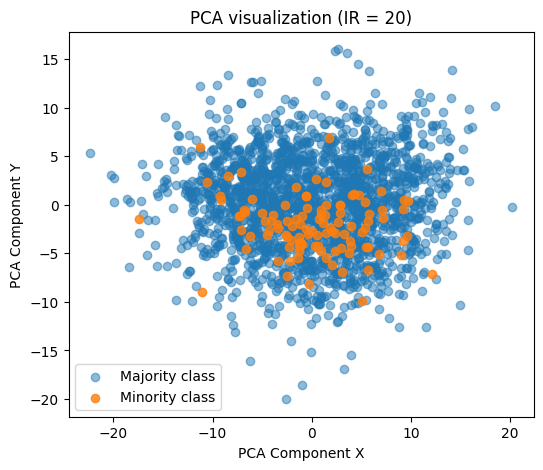

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X, y = datasets[20]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))

plt.scatter(
    X_pca[y == 0, 0],
    X_pca[y == 0, 1],
    alpha=0.5,
    label="Majority class"
)

plt.scatter(
    X_pca[y == 1, 0],
    X_pca[y == 1, 1],
    alpha=0.8,
    label="Minority class"
)

plt.xlabel("PCA Component X")
plt.ylabel("PCA Component Y")
plt.title("PCA visualization (IR = 20)")
plt.legend()
plt.show()

Subsequently, the Counter utility is used to count the number of samples in each class, providing a quantitative description of the class distribution.

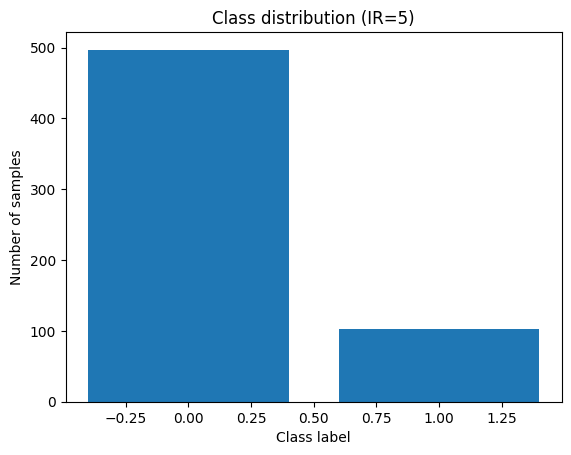

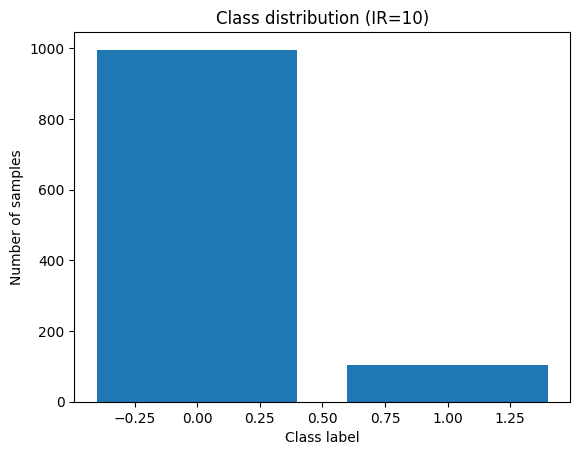

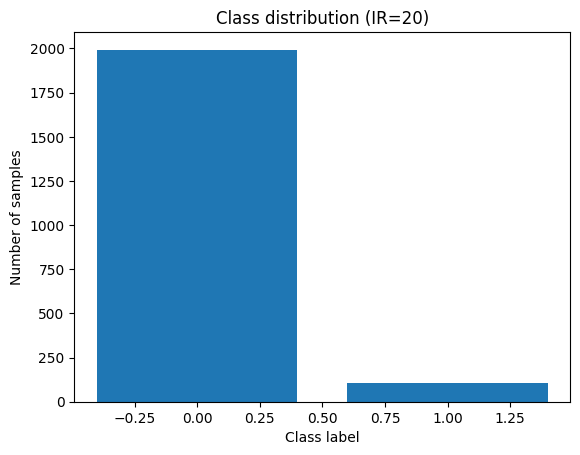

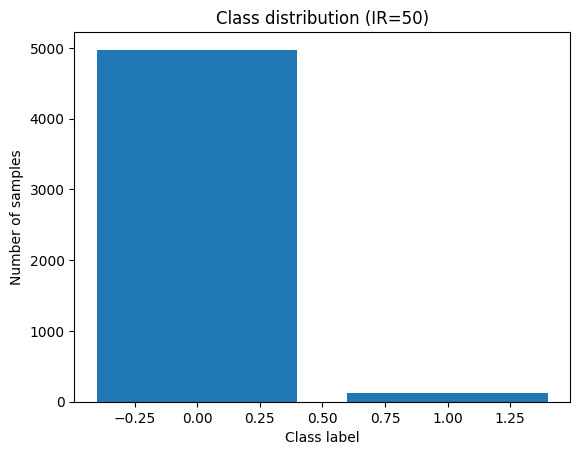

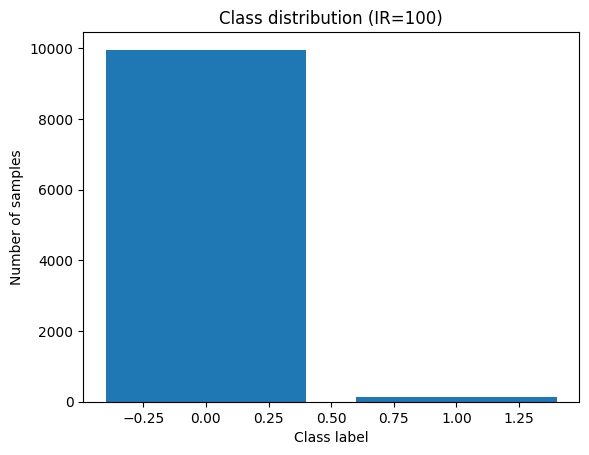

In [4]:
for ir in imbalance_ratios:
    _, y = datasets[ir]
    counts = Counter(y)
    plt.bar(counts.keys(), counts.values())
    plt.title(f"Class distribution (IR={ir})")
    plt.xlabel("Class label")
    plt.ylabel("Number of samples")
    plt.show()


### 2.2 Evaluate performance
In this report, three evaluation metrics are employed to compare the performance of different algorithms on imbalanced datasets.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, roc_auc_score, confusion_matrix
from imblearn.metrics import geometric_mean_score


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_score)
    else:
        auc = np.nan

    kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)

    return kappa, gmean, auc

### 2.3 Algorithms designed for imbalanced data

In [6]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#### 2.3.1 Balanced Random Forest
Each tree in the forest is trained on a balanced bootstrap sample, where minority and majority classes are equally represented.

In [7]:
results = []

for ir, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    brf = BalancedRandomForestClassifier(
        n_estimators=100,
        random_state=42
    )

    kappa, gmean, auc = evaluate_model(
        brf, X_train, X_test, y_train, y_test
    )

    results.append(["BRF", ir, kappa, gmean, auc])


#### 2.3.2 SMOTE + Random Forest
SMOTE generates synthetic minority samples by interpolating between existing minority instances.

In [8]:
for ir, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train)

    rf = RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )

    kappa, gmean, auc = evaluate_model(
        rf, X_res, X_test, y_res, y_test
    )

    results.append(["SMOTE+RF", ir, kappa, gmean, auc])

#### 2.3.3 Cost-Sensitive Learning
Misclassification costs are incorporated into the learning process by assigning higher weights to minority class samples.

In [9]:
for ir, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    class_weight = {
        0: 1,
        1: ir
    }

    cs_rf = RandomForestClassifier(
        n_estimators=100,
        class_weight=class_weight,
        random_state=42
    )

    kappa, gmean, auc = evaluate_model(
        cs_rf, X_train, X_test, y_train, y_test
    )

    results.append(["Cost-Sensitive RF", ir, kappa, gmean, auc])


### 2.5 Findings and insights

In [10]:
results_df = pd.DataFrame(
    results,
    columns=["Method", "IR", "Kappa", "G-mean", "AUC"]
)

results_df.groupby(["Method", "IR"]).mean()

Kappa    G-mean       AUC
Method            IR                               
BRF               5    0.672937  0.834937  0.917298
                  10   0.712176  0.816144  0.932032
                  20   0.533590  0.904397  0.965876
                  50   0.254022  0.736000  0.866146
                  100  0.114027  0.632801  0.783105
Cost-Sensitive RF 5    0.590252  0.693270  0.908855
                  10   0.303092  0.439941  0.932625
                  20   0.213343  0.353553  0.971337
                  50   0.097759  0.229416  0.871120
                  100  0.085802  0.213201  0.750525
SMOTE+RF          5    0.664474  0.819496  0.934510
                  10   0.659044  0.718421  0.937048
                  20   0.626600  0.746228  0.976981
                  50   0.374614  0.581753  0.880018
                  100  0.305476  0.451888  0.814799

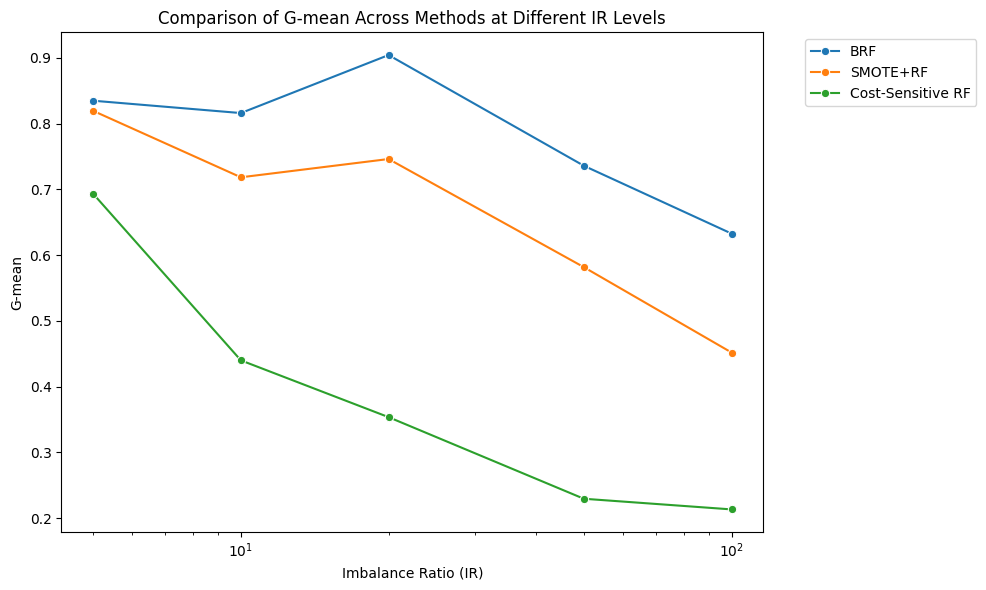

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(
    results, columns=["Method", "IR", "Kappa", "G-mean", "AUC"]
)

plt.figure(figsize=(10,6))
sns.lineplot(data=results_df, x="IR", y="G-mean", hue="Method", marker="o")
plt.xscale("log")
plt.xlabel("Imbalance Ratio (IR)")
plt.ylabel("G-mean")
plt.title("Comparison of G-mean Across Methods at Different IR Levels")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Conclusion: This table presents the performance of three algorithms—Balanced Random Forest (BRF), Cost-Sensitive Random Forest, and SMOTE combined with Random Forest—across five imbalance ratios (IR = 5, 10, 20, 50, 100).
Balanced Random Forest consistently achieves high G-mean and Kappa values across all IR levels, indicating robust performance even under extreme imbalance.
SMOTE+RF improves minority class recognition at low and medium imbalance ratios, with a G-mean of 0.819 at IR=5 and 0.746 at IR=20, but performance drops at IR=50 and 100.
Cost-Sensitive RF shows moderate improvements for minority class recall compared to BRF at low IRs but suffers substantial performance degradation at high imbalance ratios.
All methods maintain relatively high AUC values, indicating that they preserve overall class separability, but G-mean is more sensitive to the increasing imbalance.

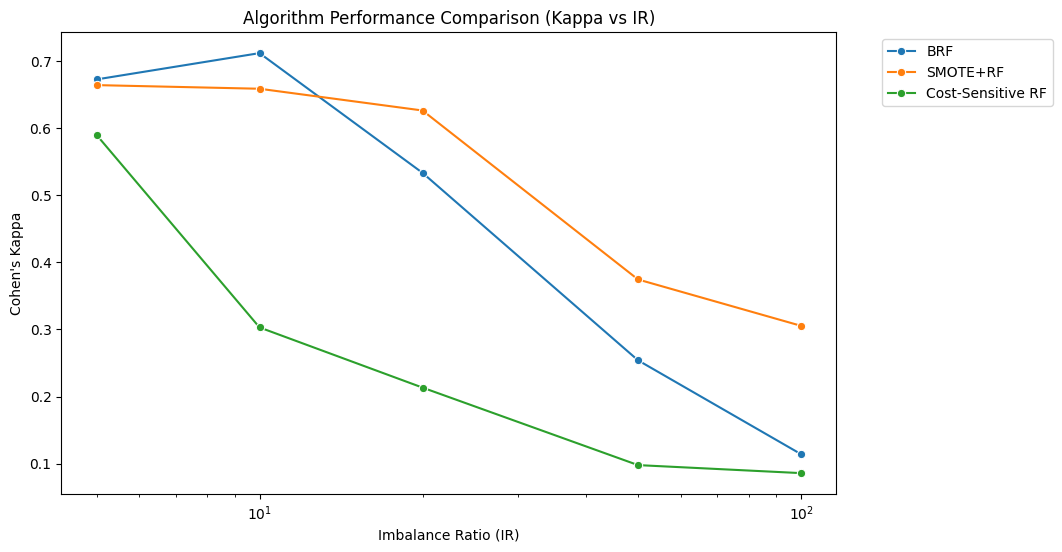

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=results_df, x="IR", y="Kappa", hue="Method", marker="o")
plt.xscale("log")  # IR跨度大，用log scale
plt.xlabel("Imbalance Ratio (IR)")
plt.ylabel("Cohen's Kappa")
plt.title("Algorithm Performance Comparison (Kappa vs IR)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Conclusion: The analysis of Kappa scores across different imbalance ratios reveals several interesting trends. At low imbalance ratios (IR ≤ 5), Balanced Random Forest (BRF) achieves the highest Kappa values, followed by SMOTE+RF, and then Cost-Sensitive RF, indicating that BRF provides the most consistent agreement between predicted and true labels under moderate imbalance. However, as the imbalance ratio increases to around IR = 10–20, the performance of BRF drops sharply, resulting in Kappa values lower than SMOTE+RF but still higher than Cost-Sensitive RF. This suggests that while BRF is robust at low imbalance levels, its relative advantage diminishes at moderate imbalance, and data-level techniques like SMOTE can become more effective in preserving label agreement. Overall, Kappa scores highlight that algorithm selection must consider the severity of imbalance, as different methods dominate at different IR levels.

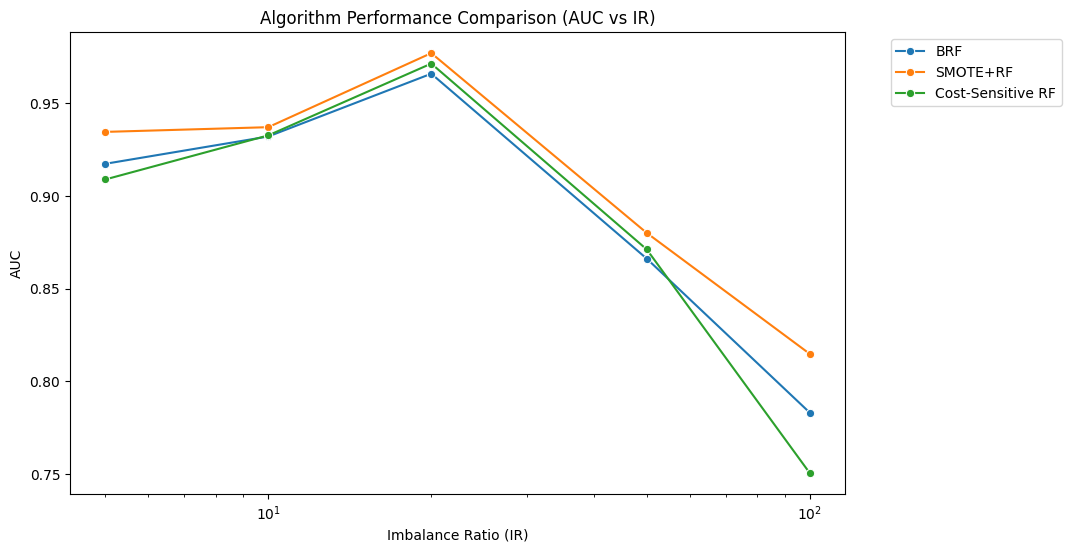

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=results_df, x="IR", y="AUC", hue="Method", marker="o")
plt.xscale("log")  # IR跨度大，用log scale
plt.xlabel("Imbalance Ratio (IR)")
plt.ylabel("AUC")
plt.title("Algorithm Performance Comparison (AUC vs IR)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Conclusion: The analysis of AUC scores across different imbalance ratios shows that SMOTE+RF consistently achieves the highest values across all IR levels, indicating strong overall class separability regardless of imbalance. At moderate imbalance levels (IR = 10–20), Cost-Sensitive RF surpasses Balanced Random Forest (BRF) in AUC, reflecting its ability to improve minority class detection relative to BRF in this range. However, as the imbalance ratio increases further (IR = 40–60), the performance of BRF declines more slowly than Cost-Sensitive RF, ultimately resulting in higher AUC for BRF at extreme imbalance levels. These results suggest that while SMOTE+RF maintains the strongest overall discrimination, BRF is more robust than Cost-Sensitive RF under extreme imbalance, highlighting the importance of considering both the type and severity of imbalance when selecting an appropriate algorithm.

## 3 Discussion
The performance evaluation of three algorithms—Balanced Random Forest (BRF), Cost-Sensitive Random Forest, and SMOTE combined with Random Forest—across varying imbalance ratios (IR = 5, 10, 20, 50, 100) reveals several important insights. Overall, BRF demonstrates robust performance at low imbalance levels, consistently achieving the highest G-mean and Kappa values when IR ≤ 5, indicating strong balance between majority and minority class predictions. As the imbalance ratio increases to moderate levels (IR = 10–20), BRF’s Kappa declines sharply, falling below SMOTE+RF while remaining higher than Cost-Sensitive RF, suggesting that data-level interventions like SMOTE can better preserve label agreement under moderate imbalance. In terms of AUC, SMOTE+RF consistently maintains the highest overall class separability across all IR levels. At moderate IRs (10–20), Cost-Sensitive RF surpasses BRF in AUC, but at higher IRs (40–60), BRF declines more slowly than Cost-Sensitive RF, resulting in superior AUC under extreme imbalance. These results collectively highlight that while SMOTE+RF is highly effective for maintaining overall discrimination, BRF is more robust for preserving balanced predictions and stable performance under severe imbalance, and Cost-Sensitive RF provides moderate improvements primarily at low to medium imbalance. The findings underscore the importance of selecting imbalance-handling methods based on both the severity of imbalance and the performance metric of interest, with G-mean capturing balanced prediction performance, Kappa reflecting label agreement, and AUC indicating overall separability.

## Reference
[1] imbalanced-learn.org. (n.d.). BalancedRandomForestClassifier — Version 0.10.1. [online] Available at: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html.  
[2] scikit-learn.org. (n.d.). sklearn.datasets.make_classification — scikit-learn 0.24.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html.  
[3] Wikipedia Contributors (2019). Cohen’s kappa. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Cohen%27s_kappa.  
[4] Wikipedia Contributors (2021). Geometric mean. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Geometric_mean.  
[5] Wikipedia Contributors (2025a). Cost-sensitive machine learning. Available at: https://en.wikipedia.org/wiki/Cost-sensitive_machine_learning.  
[6] Wikipedia.Wikipedia Contributors (2025b). Synthetic minority oversampling technique. Wikipedia. Available at:https://en.wikipedia.org/wiki/Synthetic_minority_oversampling_technique  
[7] scikit-learn.org. (n.d.). sklearn.metrics.roc_auc_score — scikit-learn 0.23.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html.  